# Variable description

Here we describe the basic features of each one variable, in the data analyzed.

Variables features:

1. Variable name

1. Variable description

1. discrete or  continuous

1. if continuous, the components that describe it (min, 25%, 50%, 75%, max, mean, number of terms)

1. if discrete, its factors

1. Histogram


In [ ]:
## Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import math
import scipy.stats as stats

In [ ]:
## Load files to the colab
dataset=pd.read_csv("sertaozinho.csv", delimiter=";")

In [ ]:
dataset.columns

Index(['id', 'grade_2012', 'grade_2017', 'follow_up', 'month', 'year',
       'school_2012', 'ethinicity', 'gender', 'failed_before_2012',
       'mother_educ', 'pre_k_pub', 'pre_k_priv', 'kinder_pub', 'kinder_priv',
       'act_2012', 'aes_2012', 'alt_2012', 'anx_2012', 'ass_2012', 'cmp_2012',
       'dep_2012', 'ids_2012', 'ord_2012', 'sfd_2012', 'lang_2012',
       'math_2012'],
      dtype='object')

In [ ]:
dataset.head()

,id,grade_2012,grade_2017,follow_up,month,year,school_2012,ethinicity,gender,failed_before_2012,mother_educ,pre_k_pub,pre_k_priv,kinder_pub,kinder_priv,act_2012,aes_2012,alt_2012,anx_2012,ass_2012,cmp_2012,dep_2012,ids_2012,ord_2012,sfd_2012,lang_2012,math_2012
1,4769,4.0,NaN,0,NaN,NaN,municipal,NaN,mulher,NaN,NaN,NaN,NaN,NaN,NaN,-0.208333,-0.069444,0.395833,0.00,-1.000000,-1.263889,-0.791667,-0.525000,0.208333,-0.441667,NaN,NaN
2,5121,5.0,NaN,0,4.0,1999.0,municipal,preta,homem,sim,em,NaN,NaN,NaN,NaN,-0.420000,0.026667,-0.460000,-0.25,-0.216000,0.306667,-0.080000,0.048000,0.920000,1.216000,28.704331,0.873114
3,1586,5.0,10.0,1,2.0,2002.0,municipal,parda,homem,nao,ef2,nao,nao,sim,nao,-2.720000,0.426667,-1.360000,1.00,-0.256000,-0.426667,-1.280000,-0.032000,-1.280000,-1.344000,55.546427,52.508735
4,3230,5.0,9.0,1,5.0,2002.0,municipal,branca,homem,nao,ef2,nao,nao,nao,nao,0.200000,-1.266667,0.600000,-0.75,1.160000,0.933333,-0.200000,1.520000,-0.700000,1.240000,42.218278,42.168412
5,2410,5.0,10.0,1,7.0,2001.0,municipal,branca,homem,nao,nunca_estudou,nao,nao,sim,nao,0.152174,-2.347826,-1.423913,1.00,-1.130435,-0.217391,-0.152174,0.076087,-1.652174,-0.173913,63.801720,72.900984


In [ ]:
dataset.shape

(4924, 27)

## id

description: A unique number that characterize a single individual of the survey. Some ids are missing, probably people who were excluded from the survey by some criteria

**discrete**

its factors: numbers between 1 and 5311

numbers of *NA*s: 0 (0%)

suggested name: -

In [ ]:
print(sum(dataset.id.duplicated())) # Ids duplicated --> none
print(sum(dataset.id.isna())) # Numbers of NA
dataset.id.sort_values().head(10) # id == 6 is missing (probably others are either)

0
0


1147     1
4859     2
1079     3
1046     4
4685     5
668      7
1876     8
4526     9
2921    10
2126    11
Name: id, dtype: int64

## grade_2012

description: which grade the student was in 2012

**discrete**

its factors: 4, 5 or 6



In [ ]:
dataset.grade_2012.value_counts(dropna = False)

5.0    1781
6.0    1705
4.0    1421
NaN      17
Name: grade_2012, dtype: int64

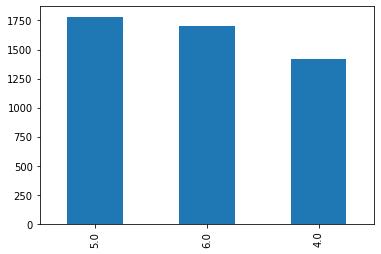

In [ ]:
dataset.grade_2012.value_counts().plot.bar()

## grade_2017

description: which grade the student was in 2017

**discrete**

its factors: 7, 8, 9, 10, 11, 12



In [ ]:
print("percentage of NAs is: ",sum(dataset.grade_2017.isna())/len(dataset.grade_2017))
dataset.grade_2017.value_counts(dropna = False)


percentage of NAs is:  0.36149471974004876


NaN     1780
10.0    1096
9.0      959
11.0     873
8.0      169
7.0       29
12.0      18
Name: grade_2017, dtype: int64

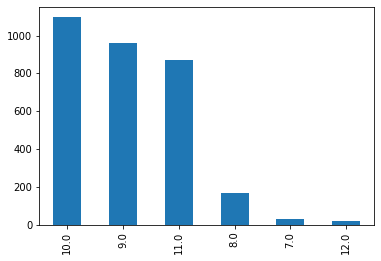

In [ ]:
dataset.grade_2017.value_counts().plot.bar()

## month, year, semester

Description: year and month of student's birth

**Discrete**


In [ ]:
print(dataset.month.isna().sum())
print(dataset.year.isna().sum())

print('Percentage of year and month missing values:\nYEAR: {}\nMONTH: {} '.format(dataset.month.isna().sum()/dataset.shape[0],
                                                                                  dataset.year.isna().sum()/dataset.shape[0]))

511
523
Percentage of year and month missing values:
YEAR: 0.1037774167343623
MONTH: 0.1062144597887896 


2001.0     1391
2002.0     1071
2000.0     1019
2003.0      381
1999.0      310
1998.0      137
1997.0       38
0.0          19
2012.0       16
1996.0       11
1994.0        3
2011.0        1
2009.0        1
200.0         1
199.0         1
20002.0       1
Name: year, dtype: int64

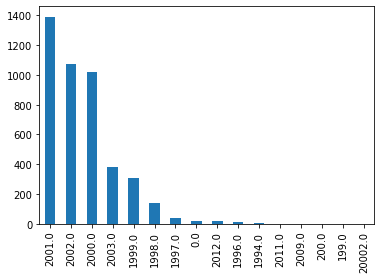

In [ ]:
dataset.year.value_counts().plot.bar()
dataset.year.value_counts() ## Some values in years are mispelled

## school_2012

Description: student's school categorie

**Categoric**

It's factors: municipal, estadual, privada



municipal    3357
estadual     1102
privada       456
Name: school_2012, dtype: int64 

# of NA: 9   Percentage:  0.18277822908204713 %



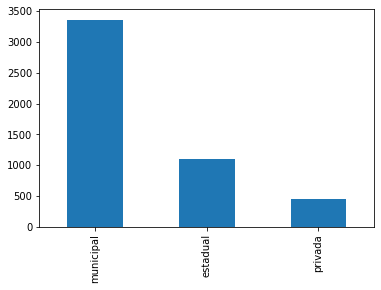

In [ ]:
print(dataset.school_2012.value_counts(),"\n")
print("# of NA:", dataset.school_2012.isna().sum(),"  Percentage: ", dataset.school_2012.isna().sum()/dataset.shape[0]*100,"%\n" )

dataset.school_2012.value_counts().plot.bar()

## ethinicity

Description: the student's ethinicity

**Categoric**

It's factors: parda, branca, preta, indigena, amarela




In [ ]:
print(dataset.ethinicity.isna().sum())
print(dataset.ethinicity.isna().sum()/dataset.shape[0]*100,"%\n")
print(dataset.ethinicity.describe(),"\n\n", dataset.ethinicity.value_counts())

print("\n\'parda\' percentage: ", dataset.ethinicity[dataset.ethinicity == "parda"].count()/dataset.shape[0]*100,"%" )
print("\'amarela\' percentage: ", dataset.ethinicity[dataset.ethinicity == "amarela"].count()/dataset.shape[0]*100,"%" )


529
10.743298131600325 %

count      4395
unique        5
top       parda
freq       2033
Name: ethinicity, dtype: object 

 parda       2033
branca      1747
preta        474
indigena      80
amarela       61
Name: ethinicity, dtype: int64

'parda' percentage:  41.28757108042242 %
'amarela' percentage:  1.2388302193338747 %


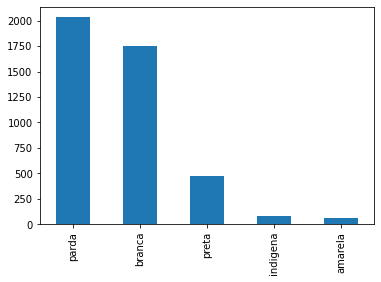

In [ ]:
dataset.ethinicity.value_counts().plot.bar()

## gender

Description: student's gender

**Categoric**

It's factors: homem, mulher


homem     2547
mulher    2365
Name: gender, dtype: int64 

# of NA: 12   Percentage:  0.2437043054427295 %

# of 'mulher': 2547   Percentage:  51.72623883021933 %

# of 'homem': 2365   Percentage:  48.030056864337936 %



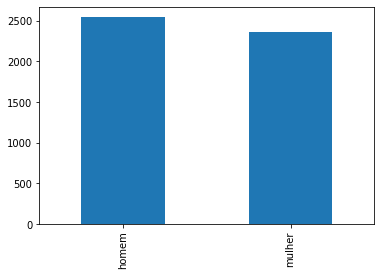

In [ ]:
print(dataset.gender.value_counts(),"\n")
print("# of NA:", dataset.gender.isna().sum(),"  Percentage: ", dataset.gender.isna().sum()/dataset.shape[0]*100,"%\n" )
print("# of 'mulher':", dataset.gender.value_counts()[0],"  Percentage: ", dataset.gender.value_counts()[0]/dataset.shape[0]*100,"%\n" )
print("# of 'homem':", dataset.gender.value_counts()[1],"  Percentage: ", dataset.gender.value_counts()[1]/dataset.shape[0]*100,"%\n" )


dataset.gender.value_counts().plot.bar()

## failed_before_2012

Description: if the student has already failed before the year of 2012

**Categoric**

It's factors: sim, nao



513
10.418359057676687 %

nao    3087
sim    1324
Name: failed_before_2012, dtype: int64 



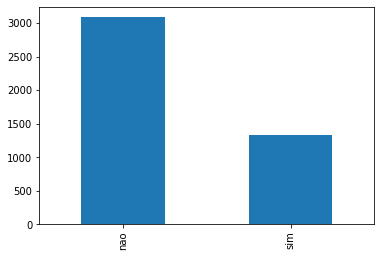

In [ ]:
print(dataset.failed_before_2012.isna().sum())
print(dataset.failed_before_2012.isna().sum()/dataset.shape[0]*100, "%\n")

print(dataset.failed_before_2012.value_counts(),"\n")

dataset.failed_before_2012.value_counts().plot.bar()

In [ ]:
print("Percentage of 'sim':  ", dataset.failed_before_2012[dataset.failed_before_2012 == "sim"].count()/dataset.shape[0]*100,"%" )
print("Percentage of 'nao':  ", dataset.failed_before_2012[dataset.failed_before_2012 == "nao"].count()/dataset.shape[0]*100,"%" )

Percentage of 'sim':   26.888708367181152 %
Percentage of 'nao':   62.69293257514216 %


## mother_educ

Description: student mother's school degree

**Categoric**

It's factors: nunca_estudou, ef1, ef2, em, superior, nao_sabe


ef1              1249
em               1054
ef2               959
nunca_estudou     628
superior          352
nao_sabe          148
Name: mother_educ, dtype: int64 

# of NA: 534   Percentage:  10.844841592201462 %



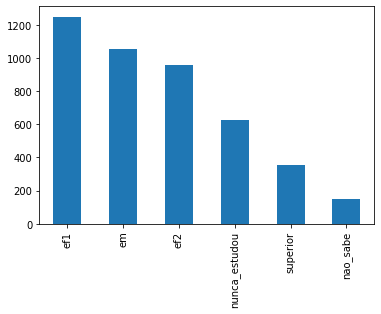

In [ ]:
print(dataset.mother_educ.value_counts(),"\n")
print("# of NA:", dataset.mother_educ.isna().sum(),"  Percentage: ", dataset.mother_educ.isna().sum()/dataset.shape[0]*100,"%\n" )

dataset.mother_educ.value_counts(sort = False)

dataset.mother_educ.value_counts().plot.bar()

## pre_k_pub, pre_k_priv, kinder_pub, kinder_priv

Description:
* pre_k_pub: if the student used to frequent a public pre-kindergarden
* pre_k_priv: if the student used to frequent a private pre-kindergarden
* kinder_pub: if the student used to frequent a public kindergarden
* kinder_priv: if the student used to frequent a private kindergarden

**Categoric**

It's factors: sim, nao



1773 1773 1773 1773
36.007311129163284 %

nao    1706
sim    1445
Name: pre_k_pub, dtype: int64 

nao    3035
sim     116
Name: pre_k_priv, dtype: int64 

sim    2389
nao     762
Name: kinder_pub, dtype: int64 

nao    2884
sim     267
Name: kinder_priv, dtype: int64 

Percentage of 'sim':   29.34606011372868 %
Percentage of 'nao':   34.64662875710805 %



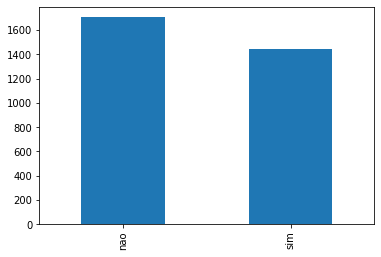

In [ ]:
print(dataset.pre_k_pub.isna().sum(), dataset.pre_k_priv.isna().sum(), dataset.kinder_pub.isna().sum(), dataset.kinder_priv.isna().sum())

print(dataset.pre_k_pub.isna().sum()/dataset.shape[0]*100,"%\n")

print(dataset.pre_k_pub.value_counts(), "\n")
print(dataset.pre_k_priv.value_counts(), "\n")
print(dataset.kinder_pub.value_counts(), "\n")
print(dataset.kinder_priv.value_counts(), "\n")

print("Percentage of 'sim':  ", dataset.pre_k_pub[dataset.pre_k_pub == "sim"].count()/dataset.shape[0]*100,"%" )
print("Percentage of 'nao':  ", dataset.pre_k_pub[dataset.pre_k_pub == "nao"].count()/dataset.shape[0]*100,"%\n" )

dataset.pre_k_pub.value_counts().plot.bar()

Percentage of 'sim':   2.3558082859463854 %
Percentage of 'nao':   61.63688058489033 %


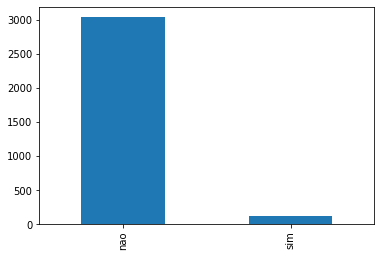

In [ ]:
print("Percentage of 'sim':  ", dataset.pre_k_priv[dataset.pre_k_priv == "sim"].count()/dataset.shape[0]*100,"%" )
print("Percentage of 'nao':  ", dataset.pre_k_priv[dataset.pre_k_priv == "nao"].count()/dataset.shape[0]*100,"%" )
dataset.pre_k_priv.value_counts().plot.bar()

Percentage of 'sim':   48.517465475223396 %
Percentage of 'nao':   15.475223395613321 %


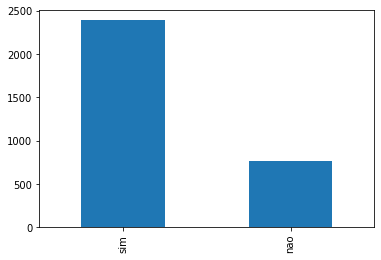

In [ ]:
print("Percentage of 'sim':  ", dataset.kinder_pub[dataset.kinder_pub == "sim"].count()/dataset.shape[0]*100,"%" )
print("Percentage of 'nao':  ", dataset.kinder_pub[dataset.kinder_pub == "nao"].count()/dataset.shape[0]*100,"%" )
dataset.kinder_pub.value_counts().plot.bar()

Percentage of 'sim':   5.422420796100731 %
Percentage of 'nao':   58.570268074735985 %


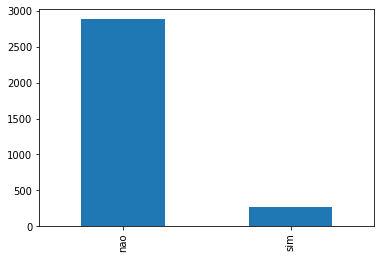

In [ ]:
print("Percentage of 'sim':  ", dataset.kinder_priv[dataset.kinder_priv == "sim"].count()/dataset.shape[0]*100,"%" )
print("Percentage of 'nao':  ", dataset.kinder_priv[dataset.kinder_priv == "nao"].count()/dataset.shape[0]*100,"%" )
dataset.kinder_priv.value_counts().plot.bar()

## lang_2012, math_2012

description: : The tests scores were standardized to have null mean and unit standard
deviation in 2012 among those students who form our actual sample; 

**continuos**

In [ ]:
print(dataset.lang_2012.describe())
print(sum(dataset.lang_2012.isna()), sum(dataset.lang_2012.isna())/len(dataset.lang_2012))
print(dataset.math_2012.describe())
print(sum(dataset.math_2012.isna()), sum(dataset.math_2012.isna())/len(dataset.math_2012))

count    3349.000000
mean       63.653910
std        21.321509
min         0.000000
25%        53.895848
50%        67.813950
75%        79.001413
max       100.000000
Name: lang_2012, dtype: float64
1575 0.31986190089358246
count    3356.000000
mean       56.666097
std        21.043323
min         0.000000
25%        44.081113
50%        59.030419
75%        70.803448
max       100.000000
Name: math_2012, dtype: float64
1568 0.31844029244516653


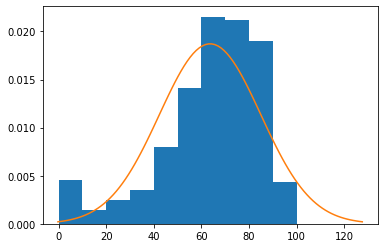

In [ ]:
mu = dataset.lang_2012.mean()
sigma = dataset.lang_2012.std()
plt.hist(dataset.lang_2012, density=True)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

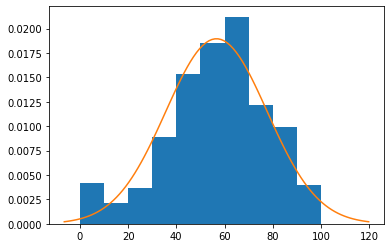

In [ ]:
mu = dataset.math_2012.mean()
sigma = dataset.math_2012.std()
plt.hist(dataset.math_2012, density=True)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

In [ ]:
df = dataset[['lang_2012', 'math_2012']]
df

,lang_2012,math_2012
1,NaN,NaN
2,28.704331,0.873114
3,55.546427,52.508735
4,42.218278,42.168412
5,63.801720,72.900984
...,...,...
4920,NaN,NaN
4921,NaN,NaN
4922,NaN,NaN
4923,NaN,NaN


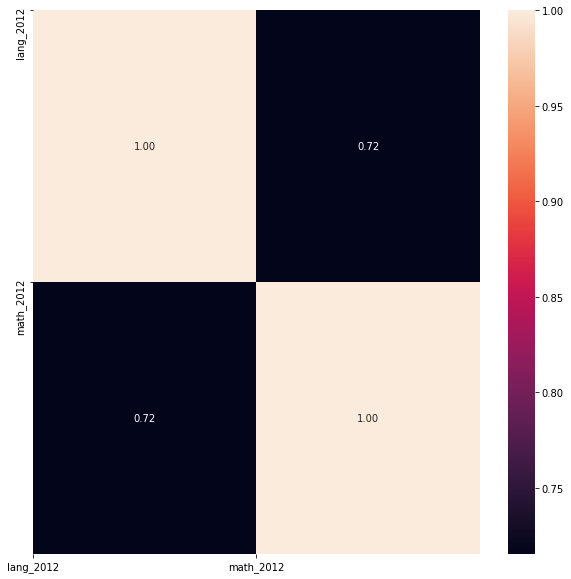

In [ ]:
df = dataset[['lang_2012', 'math_2012']]

# cria subplots de tamanho 10x10
fig, ax = plt.subplots(figsize=(10, 10))  

# gera o heatmap usando a correlação dos seus dados originais
sns.heatmap(df.corr(), annot=True, fmt=".2f") 

# Coloca o nome das colunas no eixo X
plt.xticks(range(len(df.corr().columns)), df.corr().columns)

# Coloca o nome das colunas no eixo Y
plt.yticks(range(len(df.corr().columns)), df.corr().columns)

# Exibe o heatmap
plt.show()

# Traits description

In [ ]:
dataset.columns

Index(['id', 'grade_2012', 'grade_2017', 'follow_up', 'month', 'year',
       'school_2012', 'ethinicity', 'gender', 'failed_before_2012',
       'mother_educ', 'pre_k_pub', 'pre_k_priv', 'kinder_pub', 'kinder_priv',
       'act_2012', 'aes_2012', 'alt_2012', 'anx_2012', 'ass_2012', 'cmp_2012',
       'dep_2012', 'ids_2012', 'ord_2012', 'sfd_2012', 'lang_2012',
       'math_2012'],
      dtype='object')

## act_2012

description: describes the propension to engage in energetic behaviour

**continuos**


In [ ]:
print(dataset.act_2012.describe())
print(sum(dataset.act_2012.isna()), sum(dataset.act_2012.isna())/len(dataset.act_2012))

count    4475.000000
mean        0.023420
std         0.938668
min        -3.200000
25%        -0.583333
50%         0.080000
75%         0.720000
max         2.600000
Name: act_2012, dtype: float64
449 0.09118602761982128


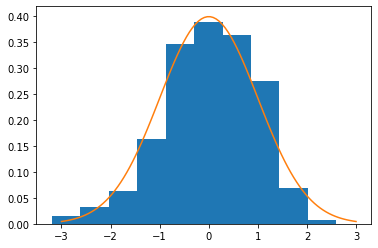

In [ ]:
mu = 0
sigma = 1
plt.hist(dataset.act_2012, density=True)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

## aes_2012

description: describes the propension to have sensibility to art

**continuos**

numbers of *NA*s: 459 (9.32%)

suggested name: Aesthetics

In [ ]:
print(dataset.aes_2012.describe())
print(sum(dataset.aes_2012.isna()), sum(dataset.aes_2012.isna())/len(dataset.aes_2012))

count    4465.000000
mean       -0.316796
std         0.829204
min        -3.304348
25%        -0.880000
50%        -0.333333
75%         0.254902
max         2.400000
Name: aes_2012, dtype: float64
459 0.09321689683184403


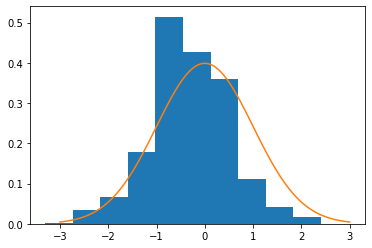

In [ ]:
mu = 0
sigma = 1
plt.hist(dataset.aes_2012, density=True)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

## alt_2012

description: High scorers can be described as warm, softhearted, gentle, generous, and kind. On the other hand,
low scorers can be described as selfish, cynical, cold, and snobbish; **(copied from the paper)**

**continuos**

numbers of *NA*s: 437 (8.87%)

suggested name: Altruism

In [ ]:
print(dataset.alt_2012.describe())
print(sum(dataset.alt_2012.isna()), sum(dataset.alt_2012.isna())/len(dataset.alt_2012))

count    4487.000000
mean       -0.528403
std         0.664771
min        -2.833333
25%        -1.010000
50%        -0.560000
75%        -0.100000
max         2.120000
Name: alt_2012, dtype: float64
437 0.08874898456539398


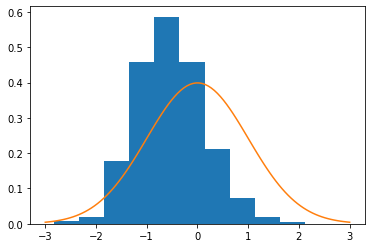

In [ ]:
mu = 0
sigma = 1
plt.hist(dataset.alt_2012, density=True)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

## anx_2012

description: High scorers can be described as apprehensive, fearful, prone to worry, nervous and tense. On the
other hand, low scorers can be described as calm, relaxed, stable, fearless; **(copied from the paper)**

**continuos**

numbers of *NA*s: 438 (8.89%)

suggested name: Anxiety

In [ ]:
print(dataset.anx_2012.describe())
print(sum(dataset.anx_2012.isna()), sum(dataset.anx_2012.isna())/len(dataset.anx_2012))

count    4486.000000
mean        0.224340
std         0.598464
min        -2.015152
25%         0.000000
50%         0.250000
75%         0.595833
max         2.400000
Name: anx_2012, dtype: float64
438 0.08895207148659626


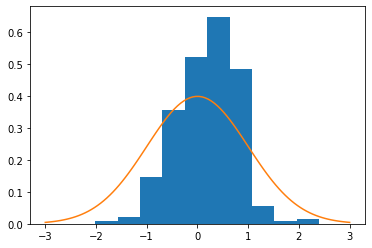

In [ ]:
mu = 0
sigma = 1
plt.hist(dataset.anx_2012, density=True)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

## ass_2012

description: High scorers can be described as dominant, forceful, confident, and decisive. On the other hand,
low scorers can be described as unassuming, retiring, and reticent; **(copied from the paper)**

**continuos**

suggested name: Assertiveness

In [ ]:
print(dataset.ass_2012.describe())
print(sum(dataset.ass_2012.isna()), sum(dataset.ass_2012.isna())/len(dataset.ass_2012))

count    4501.000000
mean       -0.056756
std         0.635765
min        -2.400000
25%        -0.448000
50%        -0.072000
75%         0.368000
max         2.400000
Name: ass_2012, dtype: float64
423 0.08590576766856214


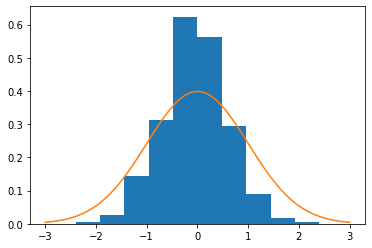

In [ ]:
mu = 0
sigma = 1
plt.hist(dataset.ass_2012, density=True)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

## cmp_2012

description: High scorers can be described as deferential, obliging, and kind. On the other hand, low scorers
can be described as stubborn, demanding, headstrong, and hardhearted; **(copied from the paper)**

**continuos**

suggested name: Compliance

In [ ]:
print(dataset.cmp_2012.describe())
print(sum(dataset.cmp_2012.isna()), sum(dataset.cmp_2012.isna())/len(dataset.cmp_2012))

count    4495.000000
mean        0.180542
std         0.837422
min        -2.117647
25%        -0.386667
50%         0.160000
75%         0.760000
max         2.565217
Name: cmp_2012, dtype: float64
429 0.08712428919577579


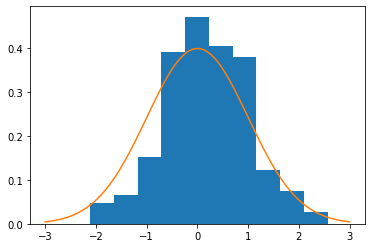

In [ ]:
mu = 0
sigma = 1
plt.hist(dataset.cmp_2012, density=True)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

## dep_2012

description: High scorers can be described as prone to feelings of guilt, sadness, hopelessness, and loneliness.
On the other hand, low scorers can be described as being seldom sad, hopeful, confident, and as feeling
worthwhile; **(copied from the paper)**

**continuos**

suggested name: Depression

In [ ]:
print(dataset.dep_2012.describe())
print(sum(dataset.dep_2012.isna()), sum(dataset.dep_2012.isna())/len(dataset.dep_2012))

count    4486.000000
mean       -0.673208
std         0.846411
min        -3.260870
25%        -1.280000
50%        -0.820000
75%        -0.200000
max         3.680000
Name: dep_2012, dtype: float64
438 0.08895207148659626


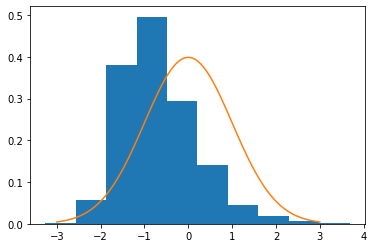

In [ ]:
mu = 0
sigma = 1
plt.hist(dataset.dep_2012, density=True)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

## ids_2012

description: High scorers can be described as intellectually curious, analytical, and theoretically oriented. On the
other hand, low scorers can be described as pragmatic, factually oriented, and unappreciative of intellectual
challenges; **(copied from the paper)**

**continuos**

suggested name: Ideas

In [ ]:
print(dataset.ids_2012.describe())
print(sum(dataset.ids_2012.isna()), sum(dataset.ids_2012.isna())/len(dataset.ids_2012))

count    4487.000000
mean        0.229372
std         0.588171
min        -2.750000
25%        -0.128000
50%         0.232000
75%         0.616000
max         2.666667
Name: ids_2012, dtype: float64
437 0.08874898456539398


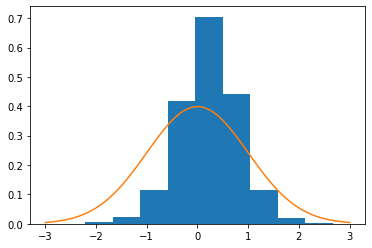

In [ ]:
mu = 0
sigma = 1
plt.hist(dataset.ids_2012, density=True)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

## ord_2012

description: High scorers can be described as precise, efficient, and methodical. On the other hand, low scorers can
be described as disorderly, impulsive, and careless; **(copied from the paper)**

**continuos**

suggested name: Order

In [ ]:
print(dataset.ord_2012.describe())
print(sum(dataset.ord_2012.isna()), sum(dataset.ord_2012.isna())/len(dataset.ord_2012))

count    4477.000000
mean       -0.479624
std         0.862154
min        -2.680000
25%        -1.130435
50%        -0.600000
75%         0.080000
max         3.040000
Name: ord_2012, dtype: float64
447 0.09077985377741674


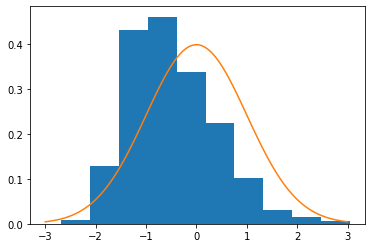

In [ ]:
mu = 0
sigma = 1
plt.hist(dataset.ord_2012, density=True)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

## sfd_2012

description: High scorers can be described as organized, thorough, energetic, capable, and efficient. On the
other hand, low scorers can be described as unambitious, forgetful, and absent-minded; **(copied from the paper)**

**continuos**

suggested name: SelfDiscipline

In [ ]:
print(dataset.sfd_2012.describe())
print(sum(dataset.sfd_2012.isna()), sum(dataset.sfd_2012.isna())/len(dataset.sfd_2012))

count    4486.000000
mean       -0.129863
std         0.688477
min        -2.571429
25%        -0.560000
50%        -0.136000
75%         0.304000
max         2.400000
Name: sfd_2012, dtype: float64
438 0.08895207148659626


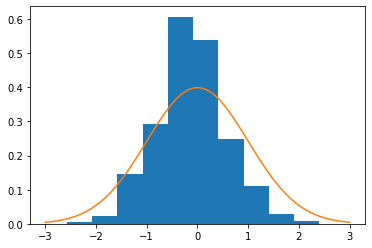

In [ ]:
mu = 0
sigma = 1
plt.hist(dataset.sfd_2012, density=True)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))